In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.shape

(5110, 12)

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.drop('id',axis=1,inplace=True)

In [12]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df['stroke'].replace({0: 'The patient did not have a stroke', 1: 'The patient had a stroke'}, inplace=True)

In [14]:
df['stroke'].value_counts()

The patient did not have a stroke    4700
The patient had a stroke              209
Name: stroke, dtype: int64

In [15]:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col_name in df.columns:
    if df[col_name].nunique() > 5:
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [18]:
X = df.drop("stroke",axis=1)
y =df['stroke']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

**SVC**

In [20]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [21]:
y_pred = svm.predict(X_test)

Train Accuracy: 96.01%


Text(0.5, 1.0, 'SVM Confusion Matrix')

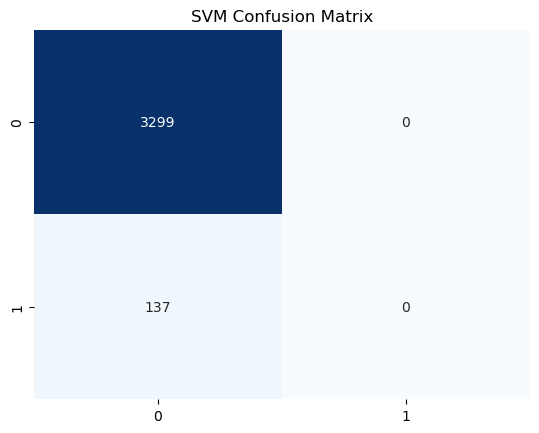

In [25]:
y_pred_train = svm.predict(X_train)
knn_accuracy_train = accuracy_score(y_train, y_pred_train)
cm = confusion_matrix(y_train, y_pred_train)
print(f"Train Accuracy: {round(knn_accuracy_train * 100,2)}%")
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('SVM Confusion Matrix')

Accuracy for test =  95.11  %


Text(0.5, 1.0, 'svm Confusion Matrix')

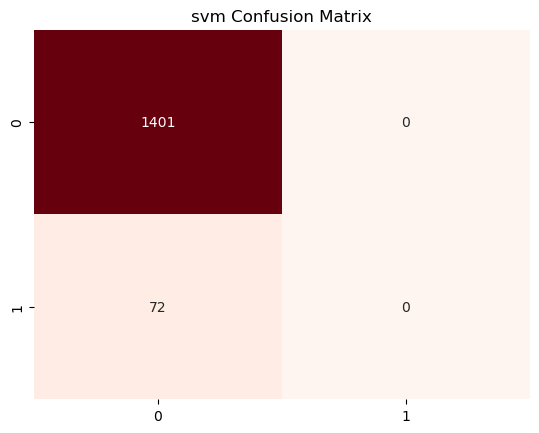

In [24]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy for test = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False,)
plt.title('svm Confusion Matrix')

**KNN**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

KNN Train Accuracy: 96.1%


Text(0.5, 1.0, 'KNN Confusion Matrix for Train Data')

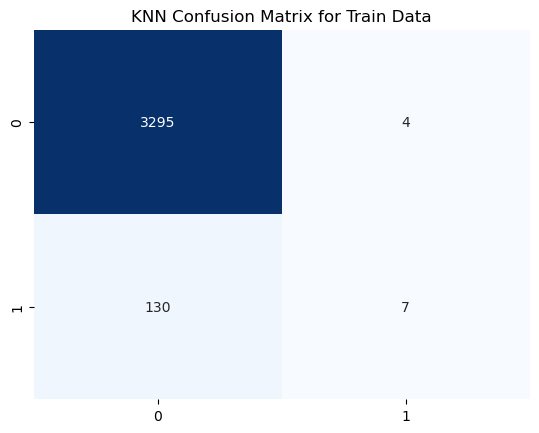

In [27]:
y_pred_train = knn.predict(X_train)
knn_accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"KNN Train Accuracy: {round(knn_accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix for Train Data')

KNN Test Accuracy: 94.98%


Text(0.5, 1.0, 'KNN Confusion Matrix for Test Data')

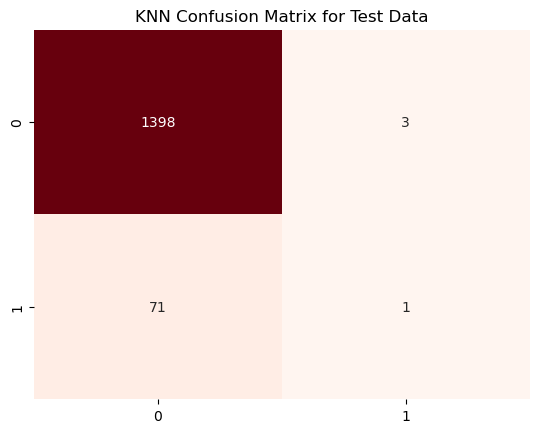

In [28]:
y_pred_test = knn.predict(X_test)
knn_accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"KNN Test Accuracy: {round(knn_accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('KNN Confusion Matrix for Test Data')

**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Train Accuracy: 100.0%


Text(0.5, 1.0, 'Random Forest Confusion Matrix for Train Data')

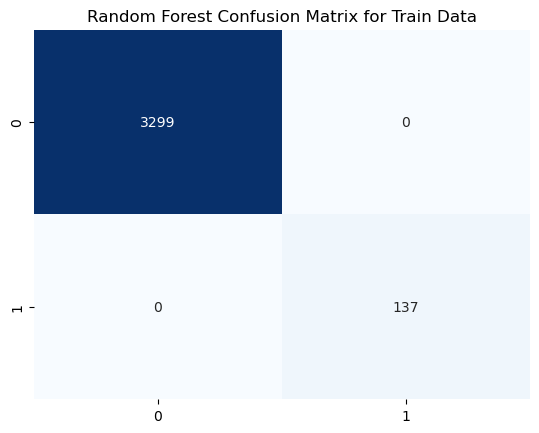

In [30]:
y_pred_train = rf.predict(X_train)
rf_accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"Random Forest Train Accuracy: {round(rf_accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix for Train Data')

Random Forest Test Accuracy: 95.18%


Text(0.5, 1.0, 'Random Forest Confusion Matrix for Test Data')

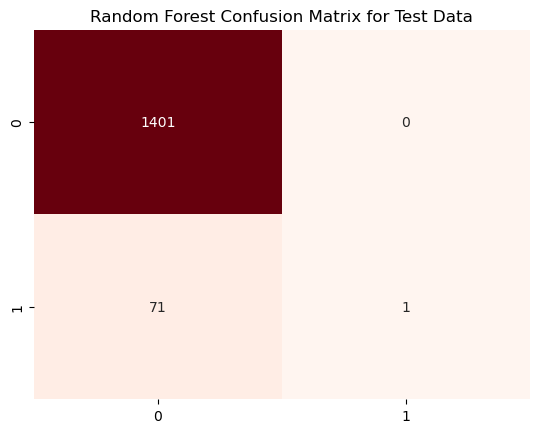

In [31]:
y_pred_test = rf.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"Random Forest Test Accuracy: {round(rf_accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Random Forest Confusion Matrix for Test Data')

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

LDA Train Accuracy: 95.29%


Text(0.5, 1.0, 'LDA Confusion Matrix for Train Data')

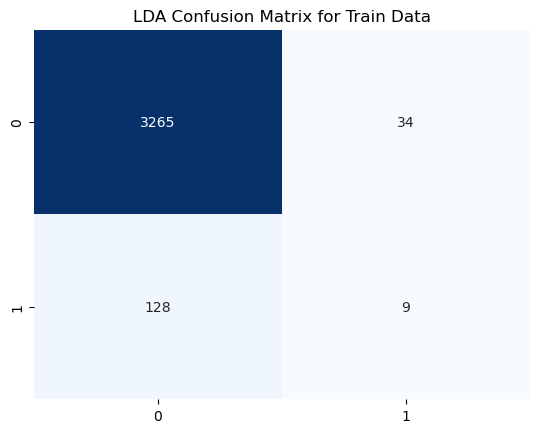

In [33]:
y_pred_train = lda.predict(X_train)
lda_accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"LDA Train Accuracy: {round(lda_accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('LDA Confusion Matrix for Train Data')

LDA Test Accuracy: 94.5%


Text(0.5, 1.0, 'LDA Confusion Matrix for Test Data')

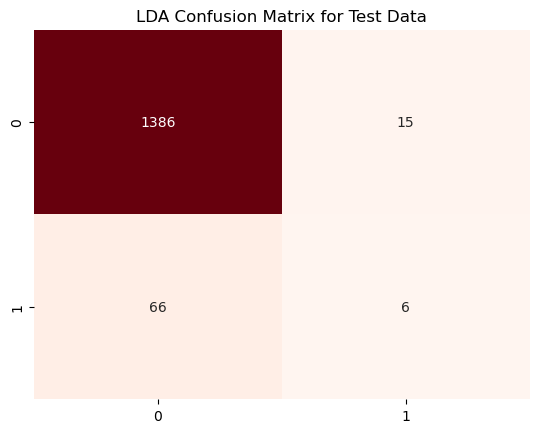

In [34]:
y_pred_test = lda.predict(X_test)
lda_accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"LDA Test Accuracy: {round(lda_accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('LDA Confusion Matrix for Test Data')

**Linear Regression**

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

LinearRegression()

In [83]:
# Make predictions
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

Mean Squared Error (Train): 0.035624623763905176
Mean Squared Error (Test): 0.042326165234619226


**Decision Trees**

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Train Accuracy: 100.0%


Text(0.5, 1.0, 'Decision Tree Confusion Matrix for Train Data')

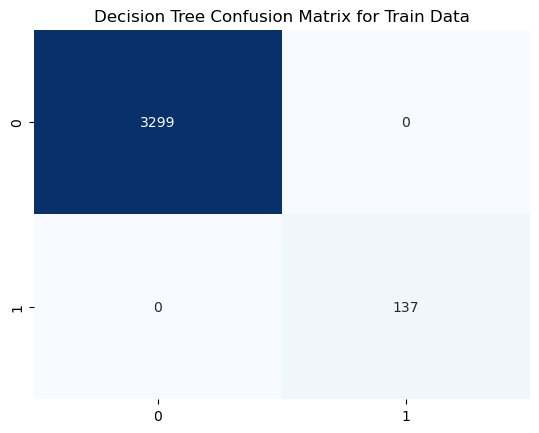

In [39]:
y_pred_train = dt.predict(X_train)
dt_accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"Decision Tree Train Accuracy: {round(dt_accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix for Train Data')

Decision Tree Test Accuracy: 90.09%


Text(0.5, 1.0, 'Decision Tree Confusion Matrix for Test Data')

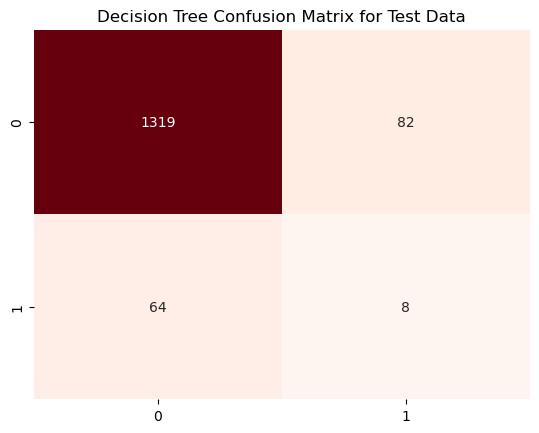

In [40]:
y_pred_test = dt.predict(X_test)
dt_accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"Decision Tree Test Accuracy: {round(dt_accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Decision Tree Confusion Matrix for Test Data')

**Naive Bayes**

In [41]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Naive Bayes Train Accuracy: 87.19%


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix for Train Data')

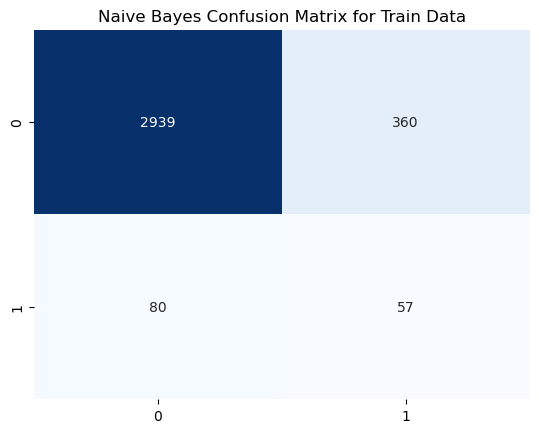

In [42]:
y_pred_train = nb.predict(X_train)
nb_accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"Naive Bayes Train Accuracy: {round(nb_accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix for Train Data')

Naive Bayes Test Accuracy: 86.9%


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix for Test Data')

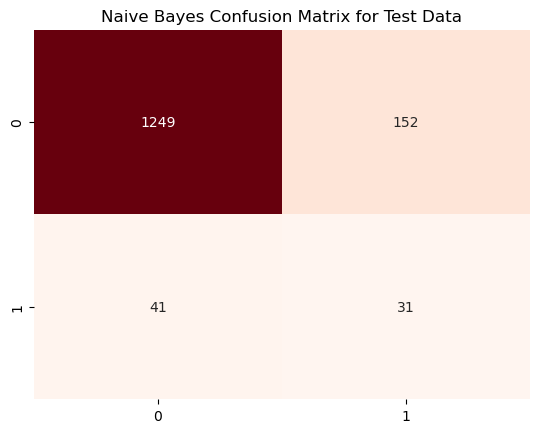

In [43]:
y_pred_test = nb.predict(X_test)
nb_accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"Naive Bayes Test Accuracy: {round(nb_accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Naive Bayes Confusion Matrix for Test Data')

**Neural Networks(MLP)**

In [44]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/Users/koyalchandresh/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

MLP Train Accuracy: 96.07%


Text(0.5, 1.0, 'MLP Confusion Matrix for Train Data')

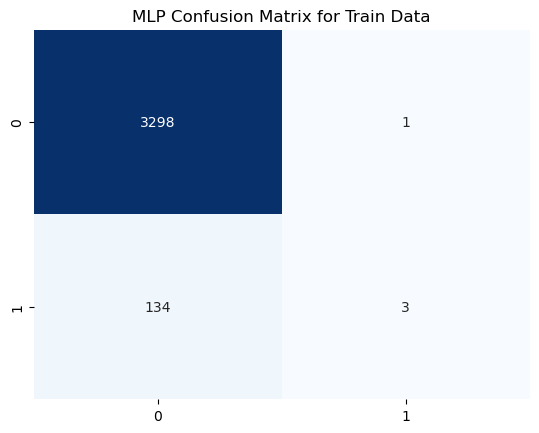

In [45]:
y_pred_train = mlp.predict(X_train)
mlp_accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"MLP Train Accuracy: {round(mlp_accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('MLP Confusion Matrix for Train Data')

MLP Test Accuracy: 95.04%


Text(0.5, 1.0, 'MLP Confusion Matrix for Test Data')

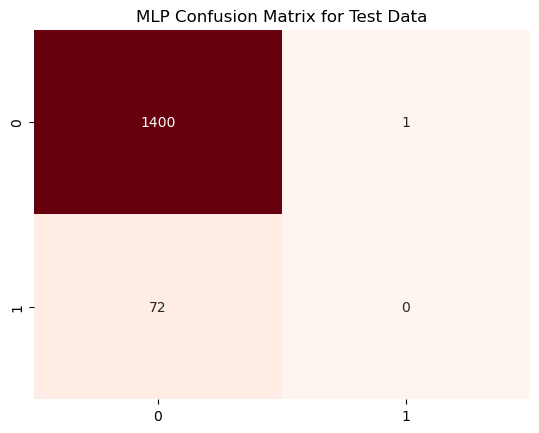

In [46]:
y_pred_test = mlp.predict(X_test)
mlp_accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"MLP Test Accuracy: {round(mlp_accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('MLP Confusion Matrix for Test Data')

**Ada Boost**

In [47]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)


AdaBoostClassifier()

AdaBoost Train Accuracy: 95.95%


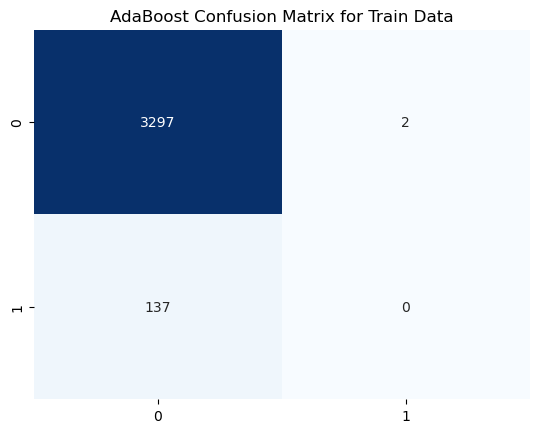

In [48]:
y_pred_train = adaboost.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"AdaBoost Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Confusion Matrix for Train Data')
plt.show()

AdaBoost Test Accuracy: 94.98%


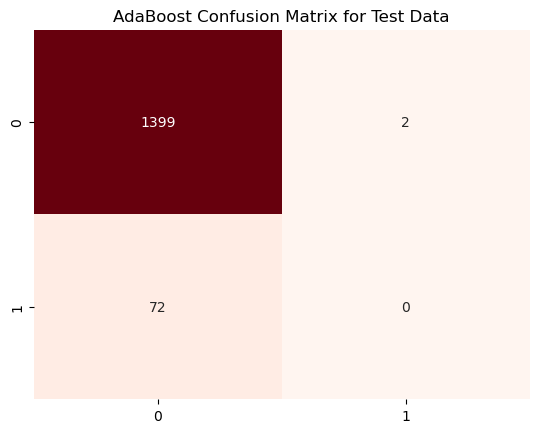

In [49]:
y_pred_test = adaboost.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"AdaBoost Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('AdaBoost Confusion Matrix for Test Data')
plt.show()

**Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Logistic Regression Train Accuracy: 96.01%


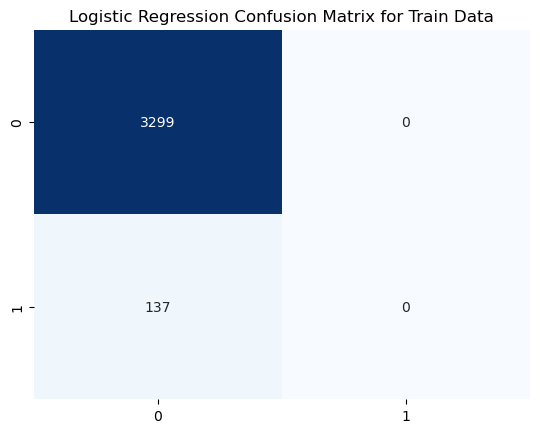

In [51]:
y_pred_train = log_reg.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"Logistic Regression Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix for Train Data')
plt.show()

Logistic Regression Test Accuracy: 95.11%


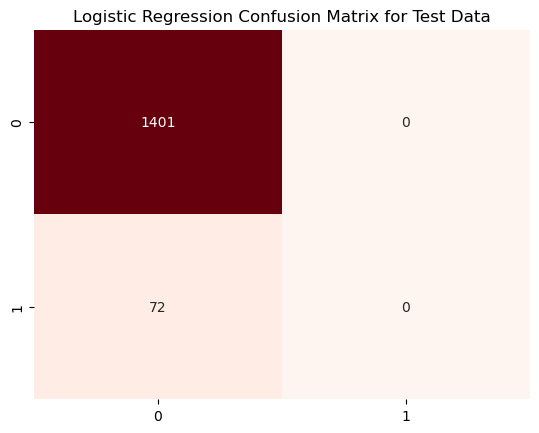

In [52]:
y_pred_test = log_reg.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"Logistic Regression Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Logistic Regression Confusion Matrix for Test Data')
plt.show()

**Ensemble Methods**

Voting

In [53]:
from sklearn.ensemble import VotingClassifier

# Initialize base classifiers
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()

In [54]:
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

Voting Classifier Train Accuracy: 100.0%


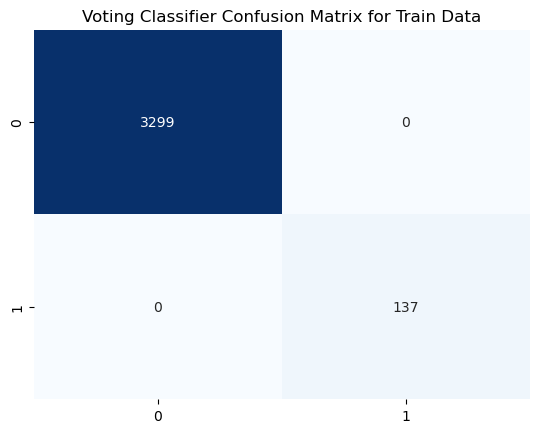

In [55]:
# Evaluation
y_pred_train = voting_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"Voting Classifier Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Voting Classifier Confusion Matrix for Train Data')
plt.show()

Voting Classifier Test Accuracy: 95.18%


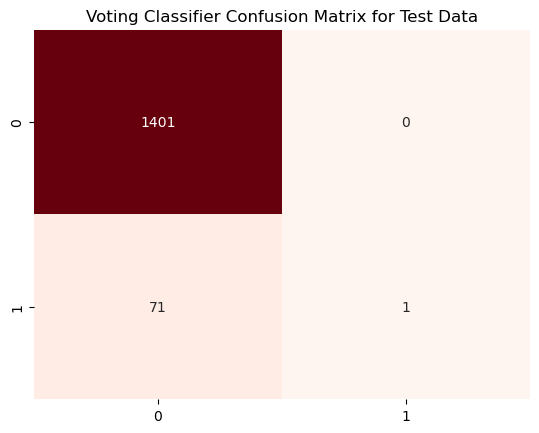

In [56]:
y_pred_test = voting_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"Voting Classifier Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Voting Classifier Confusion Matrix for Test Data')
plt.show()

Bagging

In [57]:
from sklearn.ensemble import BaggingClassifier

# Initialize base classifier
base_classifier = DecisionTreeClassifier()

# Create a BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

/Users/koyalchandresh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

Bagging Train Accuracy: 99.04%


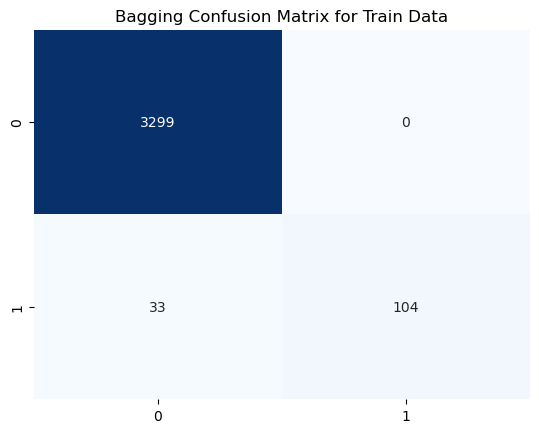

In [58]:
y_pred_train = bagging_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"Bagging Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Bagging Confusion Matrix for Train Data')
plt.show()

Bagging Test Accuracy: 94.57%


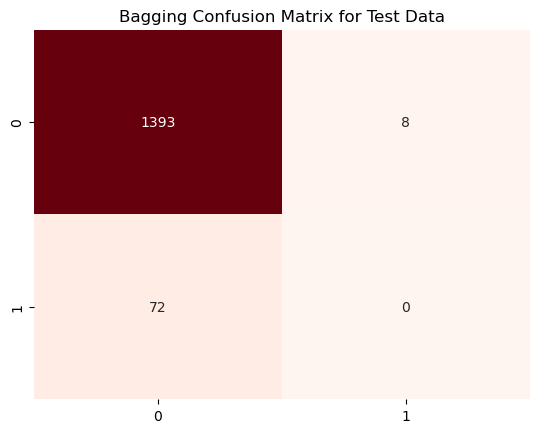

In [59]:
y_pred_test = bagging_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"Bagging Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Bagging Confusion Matrix for Test Data')
plt.show()

Boosting

In [60]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)

/Users/koyalchandresh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

AdaBoost Train Accuracy: 95.95%


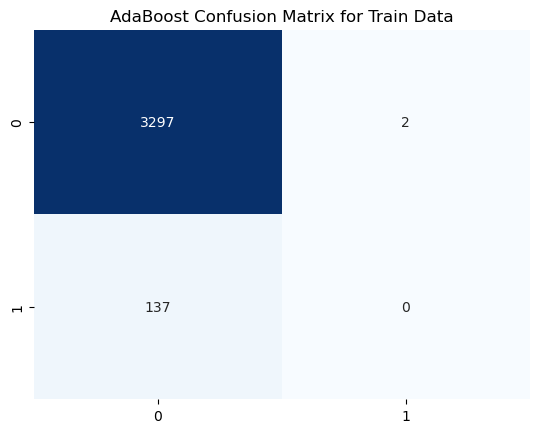

In [61]:
y_pred_train = adaboost_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"AdaBoost Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Confusion Matrix for Train Data')
plt.show()

AdaBoost Test Accuracy: 94.98%


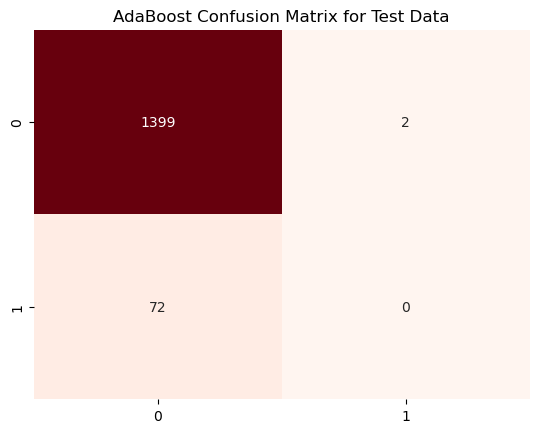

In [62]:
y_pred_test = adaboost_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"AdaBoost Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('AdaBoost Confusion Matrix for Test Data')
plt.show()

Stacking

In [63]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC()),
    # Add more base classifiers as needed
]

In [64]:
# Initialize meta-classifier
meta_classifier = LogisticRegression()

# Create a StackingClassifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

Stacking Train Accuracy: 96.01%


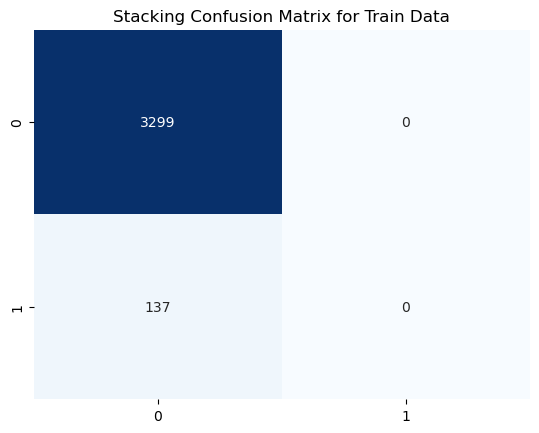

In [65]:
y_pred_train = stacking_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"Stacking Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Stacking Confusion Matrix for Train Data')
plt.show()

Stacking Test Accuracy: 95.11%


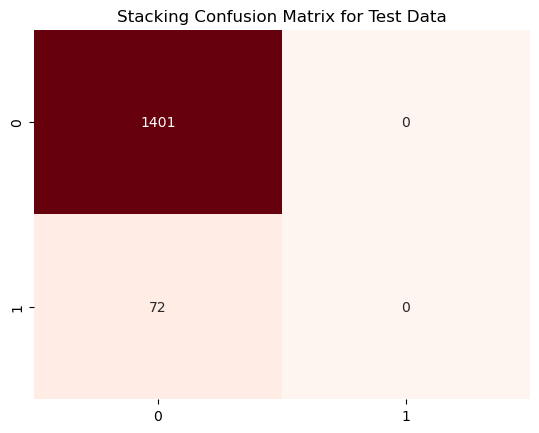

In [66]:
y_pred_test = stacking_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"Stacking Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Stacking Confusion Matrix for Test Data')
plt.show()

**KMeans Clustering**

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

/Users/koyalchandresh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

KMeans Train Accuracy: 35.16%


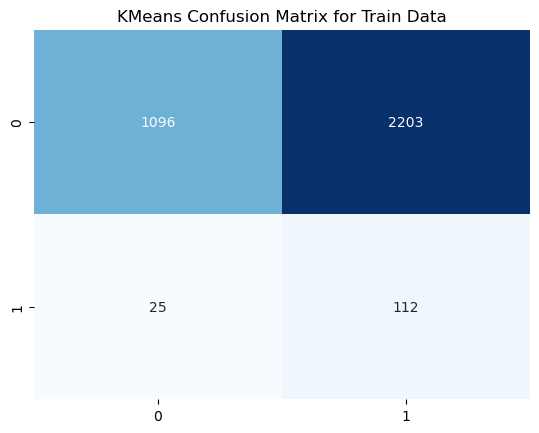

In [68]:
y_pred_train = kmeans.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"KMeans Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KMeans Confusion Matrix for Train Data')
plt.show()

KMeans Test Accuracy: 37.75%


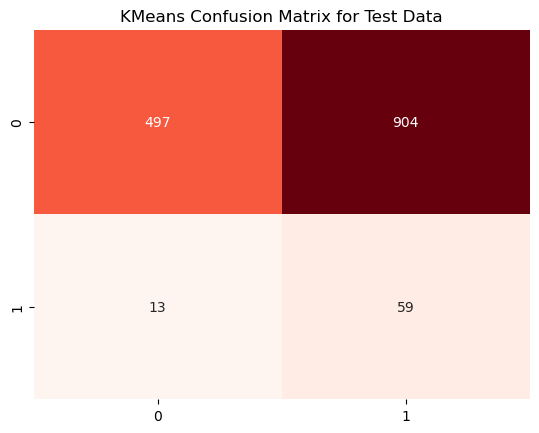

In [69]:
y_pred_test = kmeans.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"KMeans Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('KMeans Confusion Matrix for Test Data')
plt.show()

**Gaussian Processes**

In [70]:
from sklearn.gaussian_process import GaussianProcessClassifier

gp = GaussianProcessClassifier()
gp.fit(X_train, y_train)

GaussianProcessClassifier()

Gaussian Process Train Accuracy: 96.01%


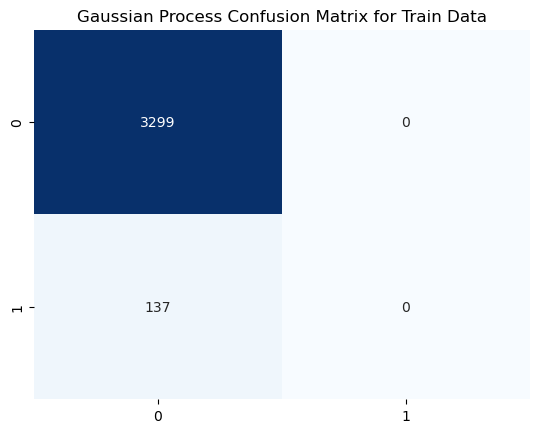

In [71]:
y_pred_train = gp.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"Gaussian Process Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gaussian Process Confusion Matrix for Train Data')
plt.show()

Gaussian Process Test Accuracy: 95.11%


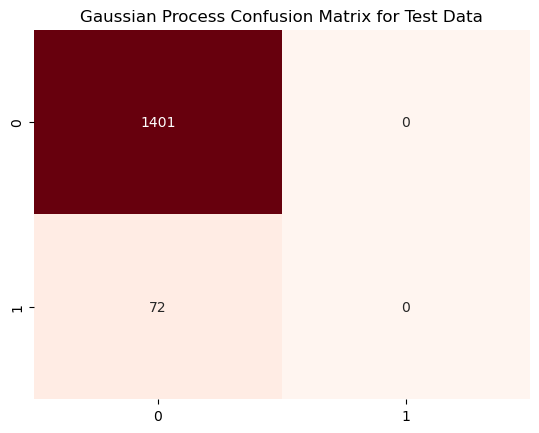

In [72]:
y_pred_test = gp.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"Gaussian Process Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Gaussian Process Confusion Matrix for Test Data')
plt.show()

**Gaussian Mixture Models**

In [73]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X_train, y_train)

GaussianMixture(n_components=2)

GMM Train Accuracy: 86.73%


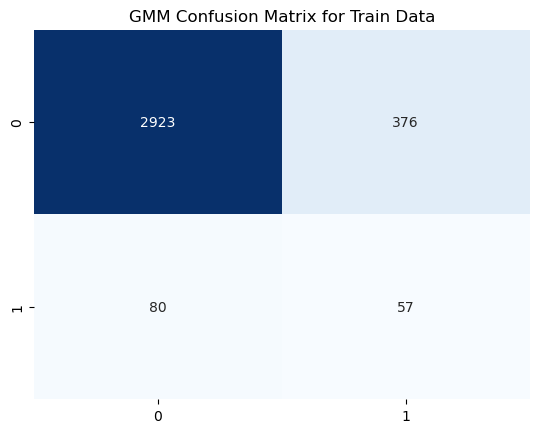

In [74]:
y_pred_train = gmm.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"GMM Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('GMM Confusion Matrix for Train Data')
plt.show()

GMM Test Accuracy: 85.68%


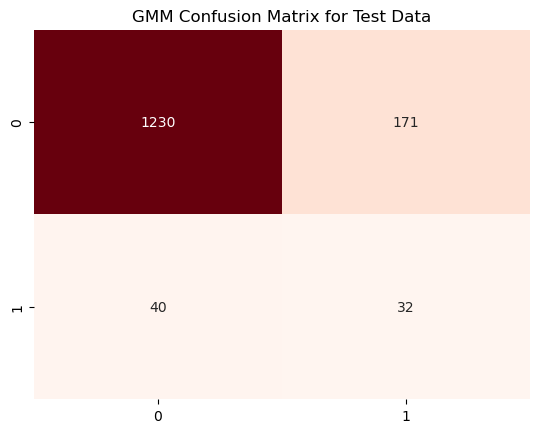

In [75]:
y_pred_test = gmm.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"GMM Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('GMM Confusion Matrix for Test Data')
plt.show()

**Quadratic Discriminant Analysis**

In [76]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

QDA Train Accuracy: 88.97%


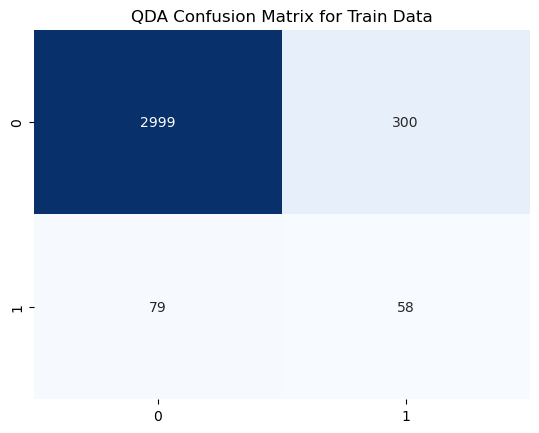

In [77]:
y_pred_train = qda.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(f"QDA Train Accuracy: {round(accuracy_train * 100,2)}%")
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('QDA Confusion Matrix for Train Data')
plt.show()

QDA Test Accuracy: 87.85%


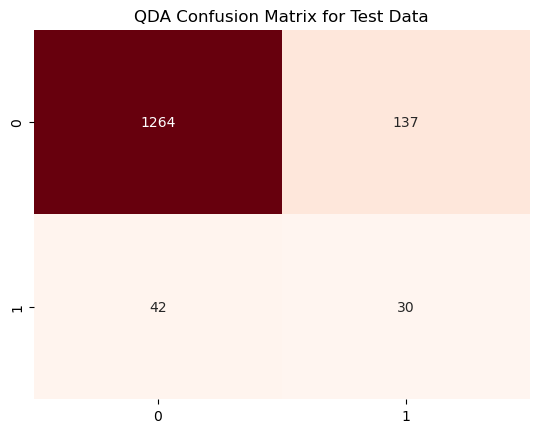

In [78]:
y_pred_test = qda.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f"QDA Test Accuracy: {round(accuracy_test * 100,2)}%")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('QDA Confusion Matrix for Test Data')
plt.show()